## Transkrip - Debat Kelima Capres Indonesia 2024



### Metadata

* Published: 13 May 2024
* Version 1
* DOI: 10.17632/njjhfv59cy.1
* Contributor:
* Virgiawan Listanto

##### Description
The dataset consists of a transcript of the fifth Indonesian presidential open debate, sourced from the official YouTube channel of the General Election Commission of Indonesia. This transcript likely includes verbatim text of the speeches, responses, and interactions between the candidates during the debate. Witten in original language of Bahasa Indonesia.



In [74]:
# CELL 1
# Langkah 1: Membaca file transkrip.txt
with open(r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\transkrip.txt', 'r', encoding='utf-8') as file:
    data = file.read()


In [ ]:
# CELL 2
import re

# Inisialisasi dictionary untuk menyimpan teks masing-masing capres
capres_dict = {
    'Anies': '',
    'Ganjar': '',
    'Prabowo': ''
}

# memecah data menjadi blok-blok berdasarkan penanda waktu atau pembicara
# menggunakan regex untuk mencari pola seperti '[HH:MM - HH:MM]\n' atau '0X Nama:'
blok_pembicaraan = re.split(r'\[\d{2}:\d{2} - \d{2}:\d{2}\]\n', data)

In [3]:
# CELL 3
# Pola untuk mendeteksi pembicara capres
pola_pembicara = re.compile(r'^(0[1-3])\s([A-Za-z]+):', re.MULTILINE)

# Mengubah kunci capres_dict menjadi huruf kecil
capres_dict = {
    'anies': '',
    'ganjar': '',
    'prabowo': ''
}

for blok in blok_pembicaraan:
    # Mencari pembicara dalam blok
    pembicara_match = pola_pembicara.search(blok)
    if pembicara_match:
        nomor = pembicara_match.group(1)
        nama = pembicara_match.group(2).lower()  # Konversi nama ke huruf kecil
        # Hanya proses jika pembicara adalah capres
        if nama in capres_dict.keys():
            # Menghapus baris yang mengandung nama pembicara
            teks_pembicaraan = pola_pembicara.sub('', blok).strip()
            # Menambahkan teks ke dalam dictionary capres
            capres_dict[nama] += teks_pembicaraan + '\n\n'

# Menyimpan teks masing-masing capres ke dalam file .txt terpisah
for nama, teks in capres_dict.items():
    filename = f'{nama}.txt'  # Nama sudah dalam huruf kecil
    with open(filename, 'w', encoding='utf-8') as file:
        file.write(teks)

print("Transkrip untuk masing-masing capres telah disimpan dalam file .txt terpisah.")


Transkrip untuk masing-masing capres telah disimpan dalam file .txt terpisah.


In [4]:
# CELL 4
import nltk
from nltk.tokenize import RegexpTokenizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import string
import os


In [5]:
# CELL 5
# Daftar nama capres
capres_list = ['anies', 'ganjar', 'prabowo']

# Inisialisasi dictionary untuk menyimpan teks asli dan hasil pemrosesan
capres_texts = {}

for capres in capres_list:
    filename = f'{capres}.txt'
    with open(filename, 'r', encoding='utf-8') as file:
        text = file.read()
        capres_texts[capres] = text


In [6]:
# CELL 6
# Download stopwords bahasa Indonesia dari NLTK jika belum ada
nltk.download('stopwords')
nltk.download('punkt')

# Mengambil stop words bahasa Indonesia
from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

# Jika ingin menambahkan stop words tambahan
stop_words.update(['ya', 'baik', 'jadi', 'akan', 'terima', 'kasih', 'bapak', 'ibu'])

# Inisialisasi stemmer bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\p\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\p\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
# CELL 7
# Inisialisasi tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Inisialisasi dictionary untuk menyimpan hasil pemrosesan
processed_texts = {}
term_frequencies = {}

for capres, text in capres_texts.items():
    print(f'Proses pemrosesan teks untuk Capres: {capres.capitalize()}')
    
    # 1. Tokenisasi menggunakan RegexpTokenizer
    tokens = tokenizer.tokenize(text)
    print(f'Jumlah token sebelum preprocessing: {len(tokens)}')
    
    # 2. Lowercasing
    tokens = [word.lower() for word in tokens]
    
    # 3. Menghapus tanda baca (sudah dilakukan oleh RegexpTokenizer)
    
    # 4. Stop Words Removal
    tokens = [word for word in tokens if word not in stop_words]
    
    # 5. Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    
    # Menyimpan hasil tokenisasi dan preprocessing
    processed_texts[capres] = tokens
    
    # 6. Menghitung Term Frequency
    freq_dist = nltk.FreqDist(tokens)
    term_frequencies[capres] = freq_dist
    
    print(f'Jumlah token setelah preprocessing: {len(tokens)}')
    print(f'10 kata paling sering muncul untuk Capres {capres.capitalize()}:')
    for word, freq in freq_dist.most_common(10):
        print(f'{word}: {freq}')
    print('\n')


Proses pemrosesan teks untuk Capres: Anies
Jumlah token sebelum preprocessing: 1639
Jumlah token setelah preprocessing: 763
10 kata paling sering muncul untuk Capres Anies:
didik: 19
bangun: 17
guru: 15
sehat: 13
kerja: 12
negara: 12
budaya: 10
republik: 9
orang: 9
anak: 9


Proses pemrosesan teks untuk Capres: Ganjar
Jumlah token sebelum preprocessing: 7133
Jumlah token setelah preprocessing: 3162
10 kata paling sering muncul untuk Capres Ganjar:
01: 121
indonesia: 48
mesti: 35
anak: 34
rakyat: 32
ganjar: 31
bicara: 29
negara: 29
sehat: 28
wara: 28


Proses pemrosesan teks untuk Capres: Prabowo
Jumlah token sebelum preprocessing: 1431
Jumlah token setelah preprocessing: 635
10 kata paling sering muncul untuk Capres Prabowo:
indonesia: 15
anak: 15
bantu: 15
budaya: 14
bidang: 13
teknologi: 12
perintah: 10
bangun: 8
dokter: 8
bangsa: 7




In [8]:
# CELL 8
from wordcloud import WordCloud
import matplotlib.pyplot as plt


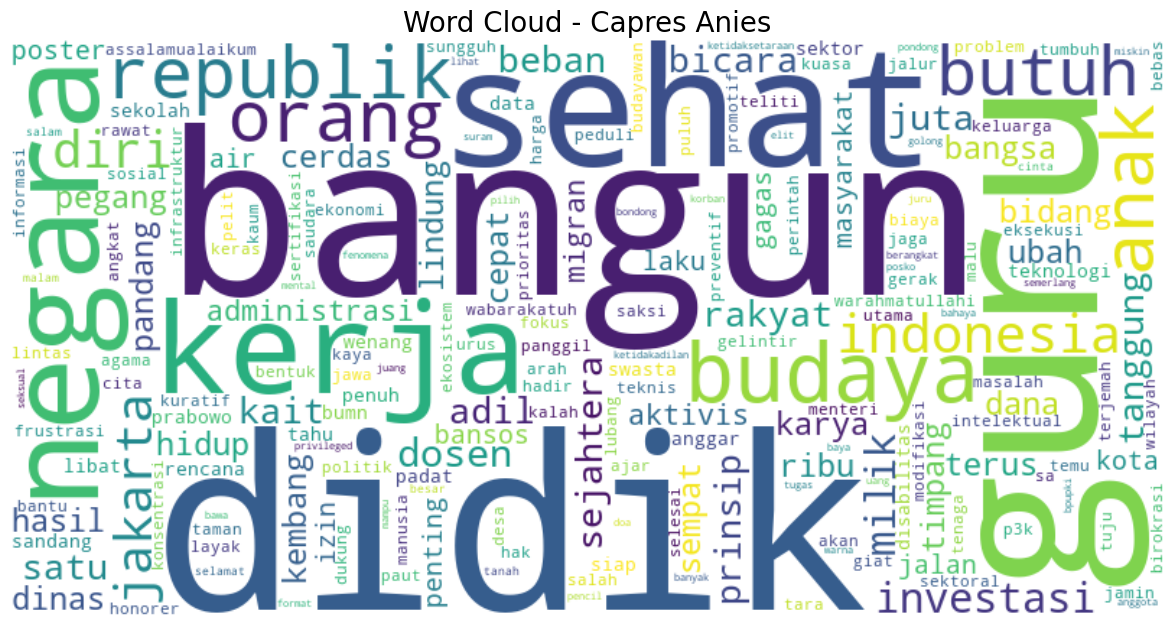

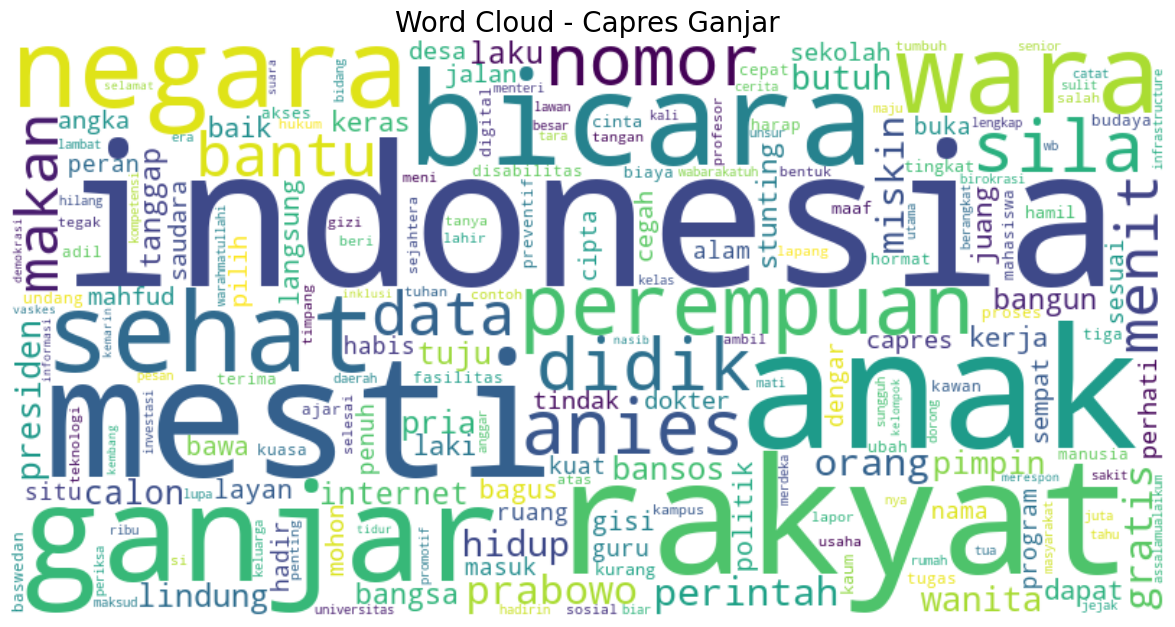

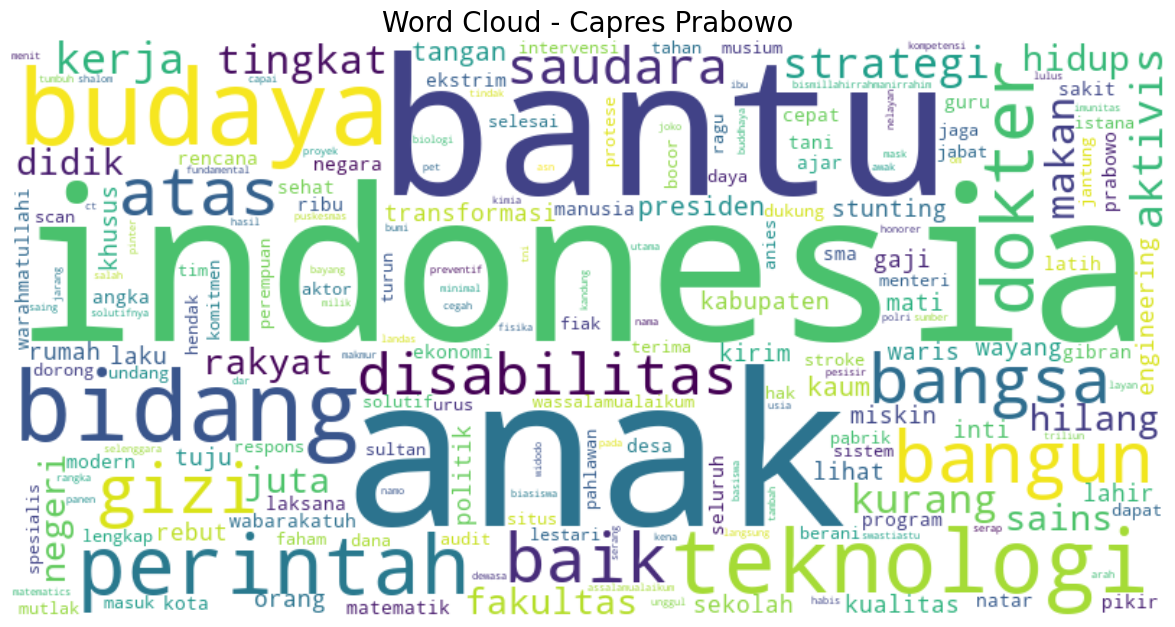

In [9]:
# CELL 9
import matplotlib.pyplot as plt

# Pastikan plot ditampilkan di notebook
%matplotlib inline

# Mengatur ukuran dan gaya font untuk judul
plt.rcParams.update({'font.size': 14})

for capres, tokens in processed_texts.items():
    # Gabungkan tokens menjadi satu string
    text = ' '.join(tokens)
    
    # Membuat WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',  # Anda dapat mengganti colormap sesuai preferensi
        collocations=False  # Menghindari penggabungan kata umum
    ).generate(text)
    
    # Menampilkan WordCloud
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Capres {capres.capitalize()}', fontsize=20)
    plt.show()

Gambar mask untuk Anies telah diproses dan disimpan sebagai D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\anies_mask_processed.png


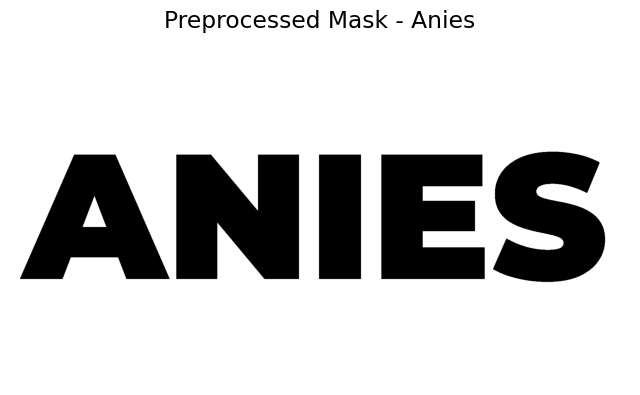

Gambar mask untuk Ganjar telah diproses dan disimpan sebagai D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\ganjar_mask_processed.png


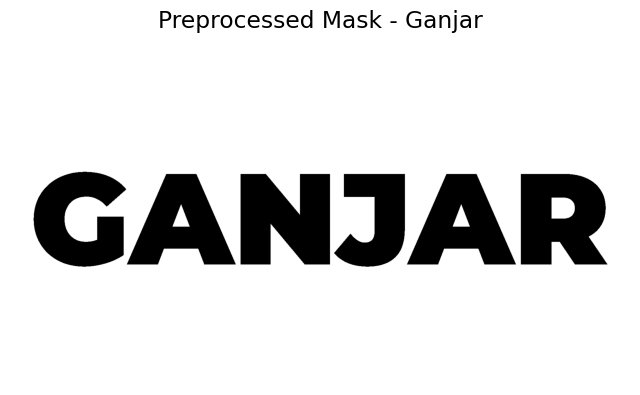

Gambar mask untuk Prabowo telah diproses dan disimpan sebagai D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\prabowo_mask_processed.png


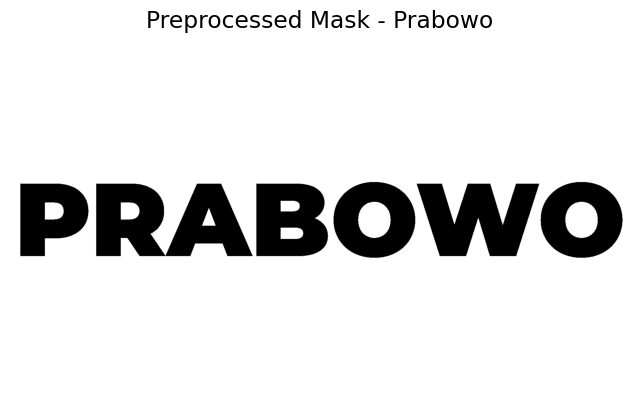

In [72]:
# CELL 10
from PIL import Image, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk memproses mask
def preprocess_mask(image_path, save_path):
    # Load gambar
    image = Image.open(image_path)

    # Konversi ke RGBA (untuk menangani background berwarna)
    image = image.convert('RGBA')

    # Menghapus background putih dengan transparansi
    datas = image.getdata()
    new_data = []
    for item in datas:
        # Ubah background putih ke transparan
        if item[0] > 200 and item[1] > 200 and item[2] > 200:  # Asumsi background terang
            new_data.append((255, 255, 255, 0))  # Transparan
        else:
            new_data.append(item)  # Tetap

    image.putdata(new_data)

    # Konversi ke grayscale
    image = image.convert('L')

    # Meningkatkan kontras
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2.0)

    # Binarisasi gambar (hitam-putih)
    threshold = 128
    image = image.point(lambda x: 0 if x < threshold else 255, '1')

    # Simpan hasil
    image.save(save_path)
    return image

# Nama file input dan output untuk masing-masing capres
input_image_files = {
    'anies': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\anies.png',
    'ganjar': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\ganjar.png',
    'prabowo': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\prabowo.png'
}

processed_image_files = {
    'anies': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\anies_mask_processed.png',
    'ganjar': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\ganjar_mask_processed.png',
    'prabowo': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\prabowo_mask_processed.png'
}

# Proses setiap gambar dan simpan
for capres, image_path in input_image_files.items():
    processed_mask = preprocess_mask(image_path, processed_image_files[capres])
    print(f"Gambar mask untuk {capres.capitalize()} telah diproses dan disimpan sebagai {processed_image_files[capres]}")

    # Menampilkan hasil mask yang telah diproses
    plt.figure(figsize=(8, 8))
    plt.imshow(processed_mask, cmap="gray")
    plt.axis("off")
    plt.title(f"Preprocessed Mask - {capres.capitalize()}")
    plt.show()


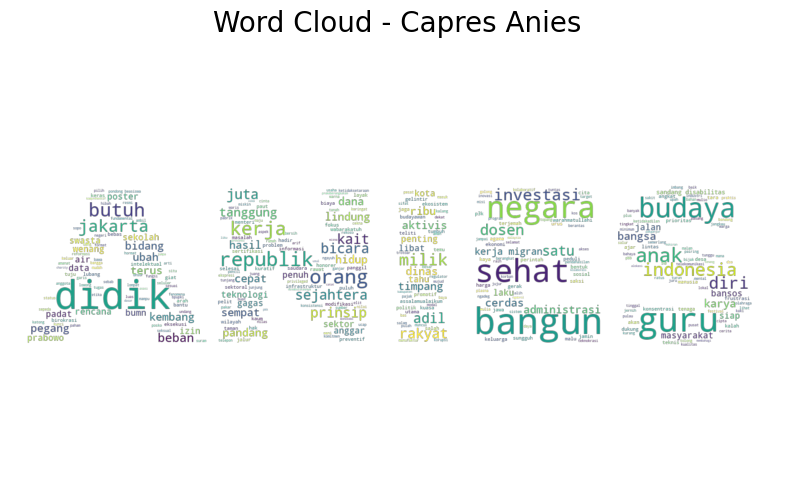

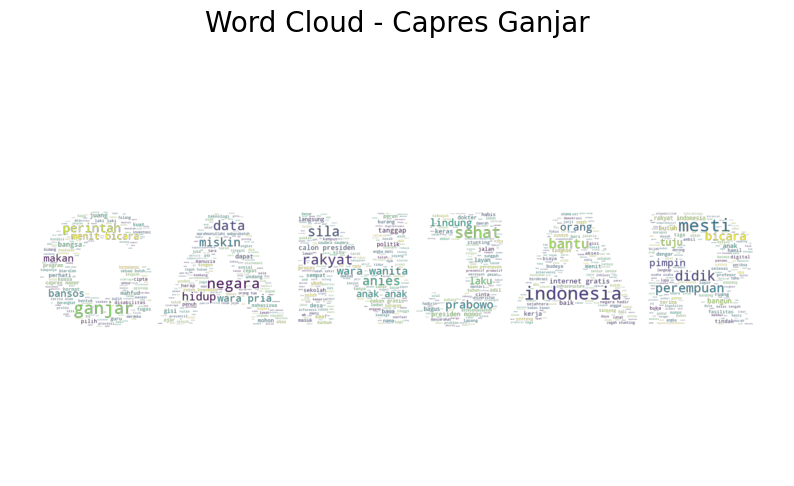

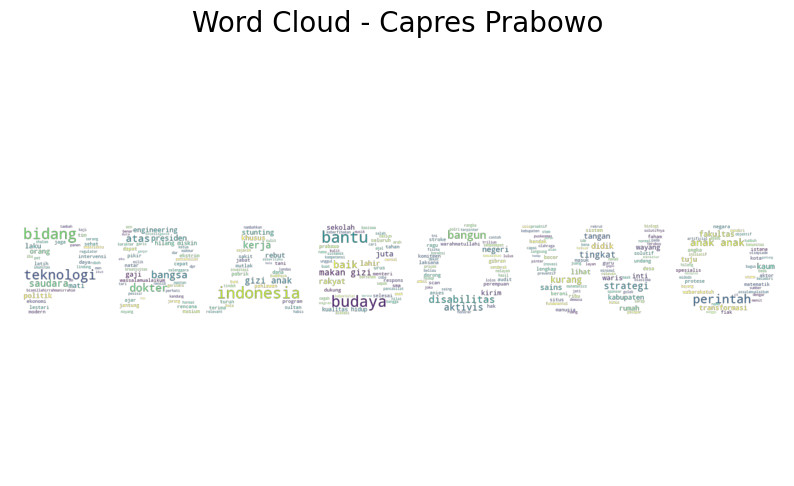

In [ ]:
from PIL import ImageOps

# Membuat Word Cloud dengan mask hasil preprocessing
processed_image_files = {
    'anies': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\anies_mask_processed.png',
    'ganjar': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\ganjar_mask_processed.png',
    'prabowo': r'D:\Kuliah\Tugas Semester 7\Visualisasi Data\8 Text Visualisation\prabowo_mask_processed.png'
}

for capres in capres_list:
    tokens = processed_texts[capres]
    text = ' '.join(tokens)
    
    # Memuat mask dan konversi ke grayscale
    mask_image = Image.open(processed_image_files[capres]).convert('L')
    
    # Konversi mask ke biner: area hitam = tempat teks, putih = kosong
    binary_mask = np.array(mask_image)
    binary_mask[binary_mask > 128] = 255  # Area putih tetap kosong
    binary_mask[binary_mask <= 128] = 0   # Area hitam digunakan untuk teks
    
    # Membuat WordCloud
    wordcloud = WordCloud(
        background_color=None, 
        mode='RGBA', 
        mask=binary_mask,
        contour_width=0,  
        max_words=2000,
        min_font_size=1, 
        prefer_horizontal=1.0, 
        width=800,  
        height=800,
        colormap='viridis'
    ).generate(text)
    
    # Menampilkan WordCloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Capres {capres.capitalize()}', fontsize=20)
    plt.show()


## Summary
#### 1. Anies Baswedan
##### Jumlah Token:
* Sebelum preprocessing: 1,639
* Setelah preprocessing: 763
##### Top 10 Kata Paling Sering Muncul:
* didik (19), bangun (17), guru (15), sehat (13), kerja (12), negara (12), budaya (10), republik (9), orang (9), anak (9)
##### Fokus Utama: Anies sering menekankan pada topik pendidikan (kata "didik" dan "guru"), kesehatan, serta pembangunan negara.
.
.
.
#### 2. Ganjar Pranowo
##### Jumlah Token:
* Sebelum preprocessing: 7,133
* Setelah preprocessing: 3,162
##### Top 10 Kata Paling Sering Muncul:
* 01 (121), indonesia (48), mesti (35), anak (34), rakyat (32), ganjar (31), bicara (29), negara (29), sehat (28), wara (28)
##### Fokus Utama: Kata-kata terkait kepemimpinan (01), nasionalisme ("indonesia," "negara"), dan perhatian terhadap rakyat serta anak-anak sering muncul dalam teks Ganjar.
.
.
.
#### 3. Prabowo Subianto
##### Jumlah Token:
* Sebelum preprocessing: 1,431
* Setelah preprocessing: 635
##### Top 10 Kata Paling Sering Muncul:
* indonesia (15), anak (15), bantu (15), budaya (14), bidang (13), teknologi (12), perintah (10), bangun (8), dokter (8), bangsa (7)
##### Fokus Utama: Prabowo menekankan pada pembangunan, bantuan, budaya, serta teknologi dan kesehatan dalam konteks nasional.
